# Indicateur

In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import utm

In [106]:
input_veh = os.getcwd() + "/OUTPUTS_7h_9h_highway/veh.csv"
veh = pd.read_csv(input_veh, delimiter = ";")
veh

,TIME,ID,TYPE,SERVICE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
0,07:00:00.00,8,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1087621.0
1,07:00:00.00,7,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1090408.0
2,07:00:00.00,6,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1080968.0
3,07:00:00.00,5,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1088592.0
4,07:01:00.00,5,Car,PersonalVehicle,m4628394748 m3283395835,628533.146 5799236.347,18.316,SERVING,1098.935,1088592.0
...,...,...,...,...,...,...,...,...,...,...
72022,09:23:00.00,8883,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
72023,09:23:00.00,8886,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
72024,09:23:00.00,8893,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
72025,09:23:00.00,8909,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN


In [157]:
def remove0Distance(df):
    ID = df['ID'].tolist()
    #indices = [i for i, x in enumerate(ID)]
    indeices = [i for i, x in enumerate(ID) if ID.count(x) > 1]
    dataframe = df.loc[indices]
    return dataframe

In [162]:
ID = veh['ID'].tolist()
indeices = [i for i, x in enumerate(ID) if ID.count(x) > 1]

In [182]:
veh2 = veh.loc[indeices]
veh2

,TIME,ID,TYPE,SERVICE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
0,07:00:00.00,8,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1087621.0
1,07:00:00.00,7,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1090408.0
2,07:00:00.00,6,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1080968.0
3,07:00:00.00,5,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1088592.0
4,07:01:00.00,5,Car,PersonalVehicle,m4628394748 m3283395835,628533.146 5799236.347,18.316,SERVING,1098.935,1088592.0
...,...,...,...,...,...,...,...,...,...,...
72022,09:23:00.00,8883,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
72023,09:23:00.00,8886,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
72024,09:23:00.00,8893,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
72025,09:23:00.00,8909,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN


In [183]:
veh2 = veh2.reset_index(drop=True)
veh2

,TIME,ID,TYPE,SERVICE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
0,07:00:00.00,8,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1087621.0
1,07:00:00.00,7,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1090408.0
2,07:00:00.00,6,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1080968.0
3,07:00:00.00,5,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1088592.0
4,07:01:00.00,5,Car,PersonalVehicle,m4628394748 m3283395835,628533.146 5799236.347,18.316,SERVING,1098.935,1088592.0
...,...,...,...,...,...,...,...,...,...,...
69601,09:23:00.00,8883,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69602,09:23:00.00,8886,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69603,09:23:00.00,8893,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69604,09:23:00.00,8909,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN


In [165]:
ID.count(8)

14

In [49]:
input_path = os.getcwd() + "/OUTPUTS_7h_9h_highway/path.csv"
path = pd.read_csv(input_path, delimiter = ";")
path

,ID,COST,PATH,LENGTH,SERVICE
0,1168071,1936.686911,ORIGIN_122 m75538939 m46336665 m76475469 m4633...,16391.371423,PersonalVehicle
1,1040303,152.889987,ORIGIN_120 m5286520818 DESTINATION_120,217.103782,PersonalVehicle
2,1034483,1486.919521,ORIGIN_120 m46386982 m4477854926 m2311116268 m...,11469.634256,PersonalVehicle
3,985601,1524.120222,ORIGIN_122 m75538939 m46336665 m76475469 m4633...,11983.003930,PersonalVehicle
4,396330,1524.120222,ORIGIN_122 m75538939 m46336665 m76475469 m4633...,11983.003930,PersonalVehicle
...,...,...,...,...,...
9405,1050286,1331.415956,ORIGIN_120 m46386982 m4477854926 m2311116268 m...,11469.634256,PersonalVehicle
9406,1106874,1094.358721,ORIGIN_121 m455971586 m46377432 m46375405 m463...,6959.951714,PersonalVehicle
9407,1120808,1599.368899,ORIGIN_122 m75538939 m46336665 m3175440817 m75...,9275.689425,PersonalVehicle
9408,1089329,23.837952,ORIGIN_106 m46186201 DESTINATION_106,33.849892,UBER


# By steps

In [52]:
"""
input_veh = os.getcwd() + "/OUTPUTS_test_every_10mn/veh.csv"
veh = pd.read_csv(input_veh, delimiter = ";")
veh
"""

'\ninput_veh = os.getcwd() + "/OUTPUTS_test_every_10mn/veh.csv"\nveh = pd.read_csv(input_veh, delimiter = ";")\nveh\n'

In [7]:
def track_a_vehicle(df, id):
    ID = df['ID'].tolist()
    indices = [i for i, x in enumerate(ID) if x == id]
    dataframe = df.loc[indices]
    return dataframe

In [209]:
df_user1 = track_a_vehicle(veh2, 8883)
df_user1

,TIME,ID,TYPE,SERVICE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
67870,09:08:00.00,8883,Car,PersonalVehicle,m75538939 m46336665,NaN,13.800,SERVING,0.000,1111572.0
68142,09:09:00.00,8883,Car,PersonalVehicle,m297103079 m4601930584,635214.575 5802980.416,17.803,SERVING,1068.209,1111572.0
68396,09:10:00.00,8883,Car,PersonalVehicle,m46362645 m3787095163,634390.988 5803663.347,17.839,SERVING,2138.528,1111572.0
68610,09:11:00.00,8883,Car,PersonalVehicle,m4620947745 m46381992,633589.693 5804165.464,17.913,SERVING,3213.304,1111572.0
68795,09:12:00.00,8883,Car,PersonalVehicle,m46359758 m46357702,633018.369 5803497.216,17.967,SERVING,4291.322,1111572.0
68956,09:13:00.00,8883,Car,PersonalVehicle,m46361186 m46361181,631988.727 5803538.403,18.012,SERVING,5372.032,1111572.0
69101,09:14:00.00,8883,Car,PersonalVehicle,m46366390 m46367805,631052.894 5803679.724,18.042,SERVING,6454.539,1111572.0
69223,09:15:00.00,8883,Car,PersonalVehicle,m956431807 m46387179,630102.165 5804097.411,18.085,SERVING,7539.635,1111572.0
69322,09:16:00.00,8883,Car,PersonalVehicle,m46411232 m46411405,629264.792 5804644.168,18.128,SERVING,8627.327,1111572.0
69408,09:17:00.00,8883,Car,PersonalVehicle,m46408934 m46400374,628627.685 5804434.963,18.153,SERVING,9716.488,1111572.0


In [210]:
df_user2 = track_a_vehicle(veh2, 800)
df_user2

,TIME,ID,TYPE,SERVICE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
3953,07:16:00.00,800,Car,PersonalVehicle,m75538939 m46336665,NaN,13.800,SERVING,0.000,718069.0
4384,07:17:00.00,800,Car,PersonalVehicle,m297103089 m297103079,635230.563 5802967.338,17.466,SERVING,1047.986,718069.0
4878,07:18:00.00,800,Car,PersonalVehicle,m46362645 m3787095163,634426.895 5803633.510,17.398,SERVING,2091.843,718069.0
5416,07:19:00.00,800,Car,PersonalVehicle,m46388817 m46388900,633592.106 5804241.750,17.318,SERVING,3130.940,718069.0
5962,07:20:00.00,800,Car,PersonalVehicle,m46359758 m46357702,633139.048 5803516.108,17.304,SERVING,4169.174,718069.0
6524,07:21:00.00,800,Car,PersonalVehicle,m1595259769 m1595259715,632327.583 5803103.107,17.275,SERVING,5205.683,718069.0
7103,07:22:00.00,800,Car,PersonalVehicle,m46341143 m46335643,631319.310 5802920.169,17.246,SERVING,6240.472,718069.0
7666,07:23:00.00,800,Car,PersonalVehicle,m94931859 m46329833,630465.831 5802719.205,17.299,SERVING,7278.382,718069.0
8226,07:24:00.00,800,Car,PersonalVehicle,m3297544688 m3349684222,629558.076 5802254.041,17.315,SERVING,8317.263,718069.0
8771,07:25:00.00,800,Car,PersonalVehicle,m46302397 m284749714,628579.325 5801913.764,17.343,SERVING,9357.872,718069.0


In [9]:
# return a dataframe containing only uber
def only_uber(df):
    service = df.SERVICE.tolist()
    [i for i,x in enumerate(service) if x == 'UBER']
    dataframe = df.loc[indices]
    return dataframe

In [215]:
input_user = os.getcwd() + "/OUTPUTS_7h_9h_highway/user.csv"
user = pd.read_csv(input_user, delimiter = ";")

In [216]:
ID = user['ID'].tolist()
indices = [i for i, x in enumerate(ID) if x == 1111572]
dataframe_user1 = user.loc[indices]
dataframe_user1

,TIME,ID,LINK,POSITION,DISTANCE,STATE,VEHICLE,CONTINUOUS_JOURNEY
86031,08:58:00.00,1111572,ORIGIN_122 m75538939,635995.585 5803966.272,0.000,WALKING,NaN,NaN
91405,09:08:57.09,1111572,ORIGIN_122 m75538939,635642.291 5803102.678,933.066,STOP,NaN,NaN
91677,09:09:00.00,1111572,m297103079 m4601930584,635214.575 5802980.416,2001.275,INSIDE_VEHICLE,8883.0,NaN
91969,09:10:00.00,1111572,m46362645 m3787095163,634390.988 5803663.347,3071.594,INSIDE_VEHICLE,8883.0,NaN
92247,09:11:00.00,1111572,m4620947745 m46381992,633589.693 5804165.464,4146.370,INSIDE_VEHICLE,8883.0,NaN
92484,09:12:00.00,1111572,m46359758 m46357702,633018.369 5803497.216,5224.389,INSIDE_VEHICLE,8883.0,NaN
92694,09:13:00.00,1111572,m46361186 m46361181,631988.727 5803538.403,6305.098,INSIDE_VEHICLE,8883.0,NaN
92881,09:14:00.00,1111572,m46366390 m46367805,631052.894 5803679.724,7387.605,INSIDE_VEHICLE,8883.0,NaN
93039,09:15:00.00,1111572,m956431807 m46387179,630102.165 5804097.411,8472.701,INSIDE_VEHICLE,8883.0,NaN
93203,09:16:00.00,1111572,m46411232 m46411405,629264.792 5804644.168,9560.393,INSIDE_VEHICLE,8883.0,NaN


In [217]:
ID = user['ID'].tolist()
indices = [i for i, x in enumerate(ID) if x == 718069]
dataframe_user2 = user.loc[indices]
dataframe_user2

,TIME,ID,LINK,POSITION,DISTANCE,STATE,VEHICLE,CONTINUOUS_JOURNEY
1223,07:06:00.00,718069,ORIGIN_122 m75538939,635995.585 5803966.272,0.000,WALKING,NaN,NaN
5796,07:16:57.09,718069,ORIGIN_122 m75538939,635642.291 5803102.678,933.066,STOP,NaN,NaN
6271,07:17:00.00,718069,m297103089 m297103079,635230.563 5802967.338,1981.052,INSIDE_VEHICLE,800.0,NaN
6876,07:18:00.00,718069,m46362645 m3787095163,634426.895 5803633.510,3024.909,INSIDE_VEHICLE,800.0,NaN
7530,07:19:00.00,718069,m46388817 m46388900,633592.106 5804241.750,4064.006,INSIDE_VEHICLE,800.0,NaN
8215,07:20:00.00,718069,m46359758 m46357702,633139.048 5803516.108,5102.240,INSIDE_VEHICLE,800.0,NaN
8913,07:21:00.00,718069,m1595259769 m1595259715,632327.583 5803103.107,6138.749,INSIDE_VEHICLE,800.0,NaN
9615,07:22:00.00,718069,m46341143 m46335643,631319.310 5802920.169,7173.538,INSIDE_VEHICLE,800.0,NaN
10332,07:23:00.00,718069,m94931859 m46329833,630465.831 5802719.205,8211.448,INSIDE_VEHICLE,800.0,NaN
11067,07:24:00.00,718069,m3297544688 m3349684222,629558.076 5802254.041,9250.329,INSIDE_VEHICLE,800.0,NaN


# Trip for one person in a day(arcgis) - users : 1111572, 718069

In [214]:
def dataArcgis(df_user):
    Position = df_user.POSITION.tolist()
    tmp1 = [i.split() for i in Position]
    position_to_latlon =  [[utm.to_latlon(float(x[0]), float(x[1]), 31, 'U')[0], utm.to_latlon(float(x[0]), float(x[1]), 31, 'U')[1]] for x in tmp1]
    lat = [i[0] for i in position_to_latlon]
    lon = [i[1] for i in position_to_latlon]
    X_Start = lat.copy()
    Y_Start = lon.copy()
    X_End = lat.copy()
    Y_End = lon.copy()
    X_Start.pop(-1)
    Y_Start.pop(-1)
    X_End.pop(0)
    Y_End.pop(0)
    df_latlon = pd.DataFrame(list(zip(lat, lon)), columns = ['lat', 'lon'])
    df_toline = pd.DataFrame(list(zip(X_Start, Y_Start, X_End, Y_End)), columns = ['X_Start', 'Y_Start', 'X_End', 'Y_End'])
    return df_latlon, df_toline

In [221]:
df_latlon1, df_toline1 = dataArcgis(dataframe_user1)

In [218]:
df_latlon2, df_toline2 = dataArcgis(dataframe_user2)

In [219]:
df_latlon2

,lat,lon
0,52.369069,4.997554
1,52.361398,4.992019
2,52.360283,4.985922
3,52.366467,4.974394
4,52.372136,4.962383
5,52.365726,4.955444
6,52.362212,4.943371
7,52.360811,4.928501
8,52.359209,4.915896
9,52.355244,4.902394


In [220]:
df_toline2

,X_Start,Y_Start,X_End,Y_End
0,52.369069,4.997554,52.361398,4.992019
1,52.361398,4.992019,52.360283,4.985922
2,52.360283,4.985922,52.366467,4.974394
3,52.366467,4.974394,52.372136,4.962383
4,52.372136,4.962383,52.365726,4.955444
5,52.365726,4.955444,52.362212,4.943371
6,52.362212,4.943371,52.360811,4.928501
7,52.360811,4.928501,52.359209,4.915896
8,52.359209,4.915896,52.355244,4.902394
9,52.355244,4.902394,52.352417,4.887901


In [225]:
#df_latlon2.to_csv('df_latlon2.csv', sep = ';', index = False)
#df_toline2.to_csv('df_toline2.csv', sep = ';', index = False)

# Dynamic

In [185]:
table = veh2.groupby(['TIME', 'STATE']).ID.count().unstack().fillna(0)
table

STATE,SERVING,STOP
TIME,,
07:00:00.00,4.0,0.0
07:01:00.00,31.0,0.0
07:02:00.00,58.0,0.0
07:03:00.00,85.0,0.0
07:04:00.00,119.0,0.0
...,...,...
09:20:00.00,14.0,15.0
09:21:00.00,8.0,6.0
09:22:00.00,5.0,3.0


<AxesSubplot:xlabel='TIME'>

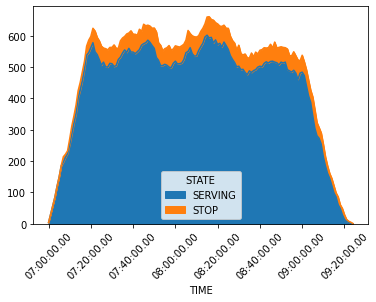

In [186]:
ax = table.plot.area()
ax.tick_params(axis='x', labelrotation = 45)
ax

In [187]:
def computeDynamic(df):
    # veh = only_uber(df)
    table = veh.groupby(['TIME', 'STATE']).ID.count().unstack().fillna(0)
    ax = table.plot.area()
    ax.tick_params(axis='x', labelrotation = 45)

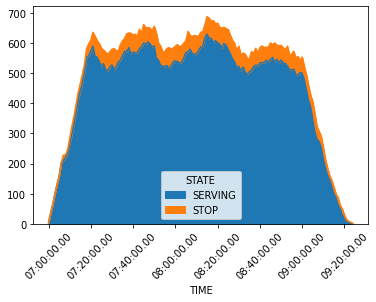

In [188]:
computeDynamic(veh2)

# Static

In [189]:
veh2

,TIME,ID,TYPE,SERVICE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
0,07:00:00.00,8,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1087621.0
1,07:00:00.00,7,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1090408.0
2,07:00:00.00,6,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1080968.0
3,07:00:00.00,5,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1088592.0
4,07:01:00.00,5,Car,PersonalVehicle,m4628394748 m3283395835,628533.146 5799236.347,18.316,SERVING,1098.935,1088592.0
...,...,...,...,...,...,...,...,...,...,...
69601,09:23:00.00,8883,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69602,09:23:00.00,8886,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69603,09:23:00.00,8893,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69604,09:23:00.00,8909,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN


## Suppose a uber with two trips

In [200]:
veh_test = veh2.replace(to_replace=18, value=800)
veh_test

,TIME,ID,TYPE,SERVICE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
0,07:00:00.00,8,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1087621.0
1,07:00:00.00,7,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1090408.0
2,07:00:00.00,6,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1080968.0
3,07:00:00.00,5,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1088592.0
4,07:01:00.00,5,Car,PersonalVehicle,m4628394748 m3283395835,628533.146 5799236.347,18.316,SERVING,1098.935,1088592.0
...,...,...,...,...,...,...,...,...,...,...
69601,09:23:00.00,8883,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69602,09:23:00.00,8886,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69603,09:23:00.00,8893,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69604,09:23:00.00,8909,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN


In [117]:
def nbTravels(index, df):
    State = df.STATE.tolist()
    i_start = [index[0]]
    i_end = []
    step = []
    cpt = 0
    t = 0
    for t in range(len(index) - 1):
        if (State[index[t]] == 'STOP') & (t != len(index) - 1): # if not the last stop
            i_start.append(index[t+1])
            i_end.append(index[t])
            cpt+=1
            t = t
    if (State[index[-1]] == 'STOP'): # if the last stop 
        i_end.append(index[-1])
        cpt+=1
        
    return (cpt, i_start, i_end) 

In [141]:
def computeStatic(df):
    # df = only_uber(df)
    time = []
    dist = []
    nbPass = []
    ids = list(set(df.ID.tolist()))
    ID = df.ID.tolist()
    State = df.STATE.tolist()
    Distance = df.DISTANCE.tolist()
    Passenger = df.PASSENGERS.tolist()
    #cleanNan = lambda l : [x for x in l if str(x) != 'nan']  # clean nan 
    Time = [float(i[:2])*3600 + float(i[3:5])*60 for i in df.TIME.tolist()]  # turn to second
    for i in ids:
        index = [m for m,x in enumerate(ID) if (x == i)]
        nb, i_start, i_end = nbTravels(index, df)
        if nb != 0:
            travel_time = sum([Time[i_end[i]] - Time[i_start[i]] for i in range(len(i_start))])
            time.append(travel_time)
            dist.append(sum([Distance[i_end[i]] for i in range(len(i_end))]))
            nbPass.append(nb)
        else:  # no passengers, no travels
            time.append(0)
            dist.append(0)
            nbPass.append(0)
    return (ids, time, dist, nbPass)

In [142]:
def buildDataframe_global(time, dist, nbPass):
    data = [['TIME', sum(time), mean(time), min(time), max(time), np.std(time)], 
            ['DISTANCE', sum(dist), mean(dist), min(dist), max(dist), np.std(dist)],
             ['PASSENGERS', sum(nbPass), mean(nbPass), min(nbPass), max(nbPass), np.std(nbPass)]]
    df = pd.DataFrame(data, columns=['PARAMETRE', 'Total', 'Mean', 'Min', 'Max', 'Sd'])
    return df                                                                                                                                                                                                        

In [201]:
ids, time, dist, nbPass = computeStatic(veh_test)

In [202]:
def buildDataframe(ids, time, dist, nbPass):
    d = {'ID': ids, 'TIME': time, 'DISTANCE': dist, 'PASSENGERS': nbPass}
    df = pd.DataFrame(data = d)
    return df

In [203]:
df1 = buildDataframe(ids, time, dist, nbPass)
df1

,ID,TIME,DISTANCE,PASSENGERS
0,5,780.0,13019.195,1
1,6,780.0,13019.195,1
2,7,780.0,13019.195,1
3,8,780.0,13019.195,1
4,10,600.0,10431.606,1
...,...,...,...,...
6482,8909,840.0,15205.946,1
6483,8910,660.0,10944.975,1
6484,8911,600.0,10138.486,1
6485,8912,660.0,10944.975,1


In [204]:
df2 = buildDataframe_global(time, dist, nbPass)
df2

,PARAMETRE,Total,Mean,Min,Max,Sd
0,TIME,3.787080e+06,583.795283,240.00,1260.000,169.670997
1,DISTANCE,6.265083e+07,9657.904512,3910.76,21344.527,2906.058112
2,PASSENGERS,6.488000e+03,1.000154,1.00,2.000,0.012415


In [205]:
len(nbPass) == len(set(veh_test.ID.tolist()))

True

## Distance per passenger

In [206]:
sum_passenger = df2.iloc[2]['Total']
sum_distance = df2.iloc[1]['Total']
distance_per_passenger = (sum_distance / sum_passenger)*1e-3  # km
distance_per_passenger

9.656415932336524

In [207]:
sum_distance

62650826.568999365